In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")

In [ ]:
data = pd.concat([train, test], axis = 0)

# EDA

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Passenger ID, Ticket and Name columns are of no use. Hence we are dropping them.**

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


**Cabin has too much missing values, so it is best to drop it.**

In [ ]:
data.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
data.dropna(subset=['Survived'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [ ]:
data['Age'].skew()

0.4344880940129925

**Treating with median is increaing the skewness too much.**

**So we treated missing values with mean.**

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
mode_value = data['Embarked'].mode()[0]  # Get the mode (most frequent value)
data['Embarked'].fillna(mode_value, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


# EDA

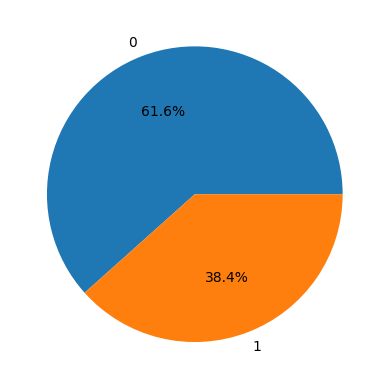

In [ ]:
plt.pie(data['Survived'].value_counts(), labels = ['0', '1'], autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

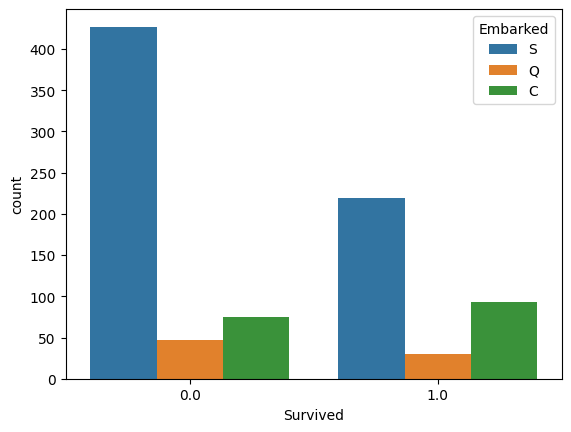

In [ ]:
sns.countplot(x='Survived',data= data,hue='Embarked')

**PEOPLE WHO BOARDED FROM SOUTHAMPTON DIED MORE.**

In [ ]:
data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Survived', ylabel='count'>

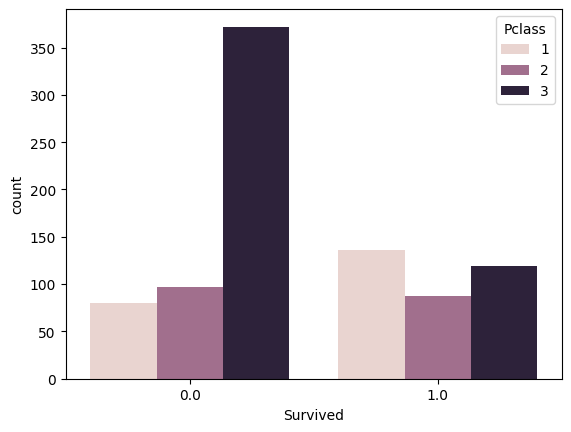

In [ ]:
sns.countplot(x='Survived',data= data ,hue='Pclass')

**PEOPLE FROM 1 CLASS SURVIVED MORE AND PEOPLE FROM 3 CLASS DIED MORE.**

<Axes: xlabel='Survived', ylabel='count'>

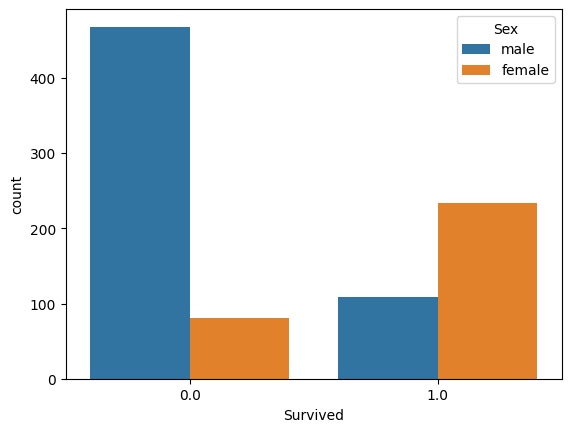

In [ ]:
sns.countplot(x='Survived',data= data,hue='Sex')

**MOSTLY WOMEN SURVIVED.**

<Axes: xlabel='Survived', ylabel='count'>

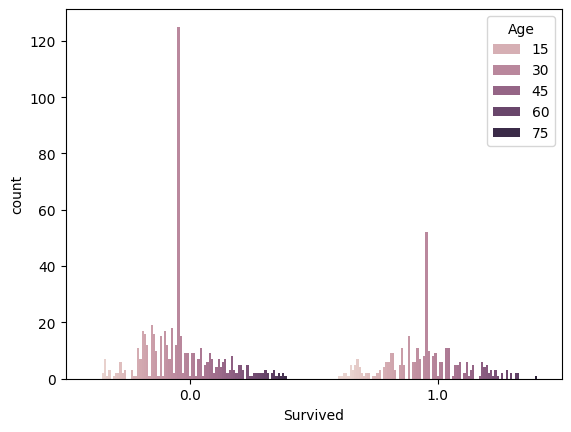

In [ ]:
sns.countplot(x='Survived', data= data, hue="Age")

In [ ]:
data['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp', ylabel='count'>

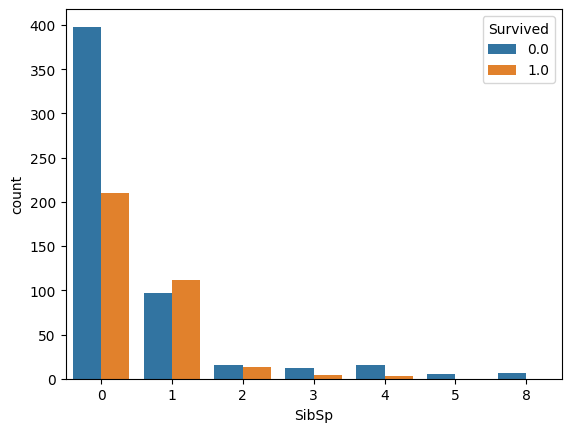

In [ ]:
sns.countplot(x='SibSp',data= data,hue='Survived')

<Axes: >

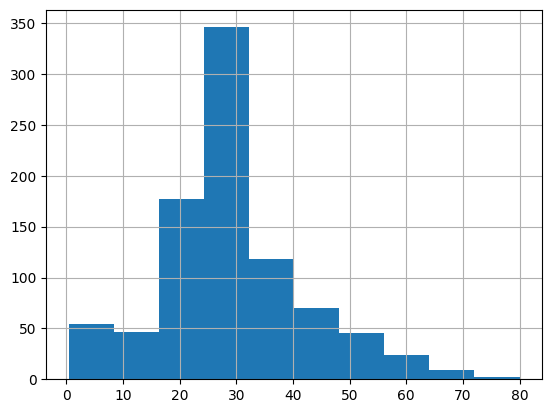

In [ ]:
data['Age'].hist()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,2
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,2
3,1.0,1,0,35.0,1,0,53.1000,2
4,0.0,3,1,35.0,0,0,8.0500,2


# XGBM

In [ ]:
y = data['Survived']
x = data.drop(['Survived'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
!pip install Xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, gamma= 100, alpha = 0.1)
xgb.fit(x_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=100, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
#Predict on the training and testing sets
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

#Calculate the root mean square error
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

#Print the results
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Variance:", rmse_test - rmse_train)

Train RMSE: 0.4844833856707952
Test RMSE: 0.49383300902048816
Variance: 0.00934962334969297


**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, x, y, cv=5, scoring='neg_root_mean_squared_error')  # Use negative RMSE for scoring
print("Cross-validation RMSE scores:", -scores)
print("Average cross-validation RMSE:", -scores.mean())


Cross-validation RMSE scores: [0.37413807 0.37576471 0.35780607 0.39260205 0.33347188]
Average cross-validation RMSE: 0.3667565555874618


In [ ]:
from sklearn.model_selection import GridSearchCV

#Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9],
}

#Create the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv=5)

#Fit the grid search object to the data
grid_search.fit(x_train, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.01}


# LGBM

In [ ]:
import lightgbm as lgb

# Create LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

In [ ]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
y_pred_train = bst.predict(x_train)
y_pred_test = bst.predict(x_test)

In [ ]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_train_binary = [1 if x >= 0.5 else 0 for x in y_pred_train]
y_pred_test_binary = [1 if x >= 0.5 else 0 for x in y_pred_test]

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
test_accuracy = accuracy_score(y_test, y_pred_test_binary)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8946629213483146
Test Accuracy: 0.8324022346368715


In [ ]:
#Calculate the root mean square error
rmse_train = mean_squared_error(y_train, y_pred_train_binary, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test_binary, squared=False)

#Print the results
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Variance:", rmse_test - rmse_train)

Train RMSE: 0.3245567418059366
Test RMSE: 0.40938706057120133
Variance: 0.08483031876526476


**LIGHTGBM IS PERFORMING BETTER THAN XGBM.**

---
The accuracy of both,

**LIGHTGBM : 83%**

**XGBM : 58%**

